In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("flo_data_20k.csv")
df=data.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [4]:
df["order_num_total_ever"]=df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]
df["customer_value_total_ever"]=df["customer_value_total_ever_online"]+df["customer_value_total_ever_offline"]
df.drop(["last_order_date_online","last_order_date_offline"
         ,"order_num_total_ever_online","order_num_total_ever_offline"
         ,"customer_value_total_ever_online","customer_value_total_ever_offline"],axis=1,inplace=True)
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,interested_in_categories_12,order_num_total_ever,customer_value_total_ever
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,[AKTIFSPOR],2.0,209.98


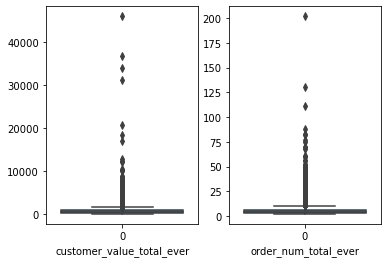

In [5]:
plt.subplot(1,2,1)
sns.boxplot(data=df["customer_value_total_ever"])
plt.xlabel("customer_value_total_ever")
plt.subplot(1,2,2)
sns.boxplot(data=df["order_num_total_ever"])
plt.xlabel("order_num_total_ever")
plt.show()

In [6]:
def outlier_thresholds(dataframe, target):
    
    q1 = dataframe[target].quantile(0.05)
    q3 = dataframe[target].quantile(0.95)
    IQR = q3 - q1
    lower_limit = round(q1 - 1.5*IQR)
    upper_limit = round(q3 + 1.5*IQR)
    return lower_limit,upper_limit
    
def replace_with_thresholds(dataframe, target):
    lower_limit,upper_limit = outlier_thresholds(dataframe, target)
    dataframe.loc[(dataframe[target]>=upper_limit), target] = upper_limit

In [7]:
replace_with_thresholds(df,"customer_value_total_ever")

In [8]:
replace_with_thresholds(df,"order_num_total_ever")

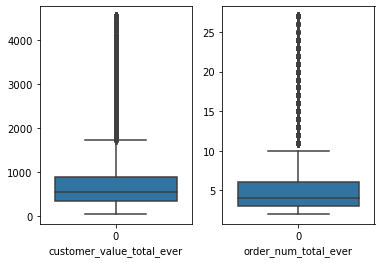

In [9]:
plt.subplot(1,2,1)
sns.boxplot(data=df["customer_value_total_ever"])
plt.xlabel("customer_value_total_ever")
plt.subplot(1,2,2)
sns.boxplot(data=df["order_num_total_ever"])
plt.xlabel("order_num_total_ever")
plt.show()

In [10]:
df["order_num_total_ever"]=df["order_num_total_ever"].astype("int64")
df["customer_value_total_ever"]=df["customer_value_total_ever"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   master_id                    19945 non-null  object
 1   order_channel                19945 non-null  object
 2   last_order_channel           19945 non-null  object
 3   first_order_date             19945 non-null  object
 4   last_order_date              19945 non-null  object
 5   interested_in_categories_12  19945 non-null  object
 6   order_num_total_ever         19945 non-null  int64 
 7   customer_value_total_ever    19945 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [11]:
df["first_order_date"]=pd.to_datetime(df["first_order_date"])
df["last_order_date"]=pd.to_datetime(df["last_order_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   master_id                    19945 non-null  object        
 1   order_channel                19945 non-null  object        
 2   last_order_channel           19945 non-null  object        
 3   first_order_date             19945 non-null  datetime64[ns]
 4   last_order_date              19945 non-null  datetime64[ns]
 5   interested_in_categories_12  19945 non-null  object        
 6   order_num_total_ever         19945 non-null  int64         
 7   customer_value_total_ever    19945 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.2+ MB


In [12]:
df["dif_between_order_dates"]=df["last_order_date"]-df["first_order_date"]
df["dif_between_order_dates"]=df["dif_between_order_dates"].dt.days
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   master_id                    19945 non-null  object        
 1   order_channel                19945 non-null  object        
 2   last_order_channel           19945 non-null  object        
 3   first_order_date             19945 non-null  datetime64[ns]
 4   last_order_date              19945 non-null  datetime64[ns]
 5   interested_in_categories_12  19945 non-null  object        
 6   order_num_total_ever         19945 non-null  int64         
 7   customer_value_total_ever    19945 non-null  int64         
 8   dif_between_order_dates      19945 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 1.4+ MB
None


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,interested_in_categories_12,order_num_total_ever,customer_value_total_ever,dif_between_order_dates
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,[KADIN],5,939,119
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013,1469
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,"[ERKEK, KADIN]",5,585,366
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,"[AKTIFCOCUK, COCUK]",2,121,11
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,[AKTIFSPOR],2,209,582


In [13]:
df["master_id"].nunique()

19945

In [14]:
today_date="2021-12-31"
today_date=pd.to_datetime(today_date)
df["T"]=today_date - df["first_order_date"]
df["T"]=df["T"].dt.days
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,interested_in_categories_12,order_num_total_ever,customer_value_total_ever,dif_between_order_dates,T
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,[KADIN],5,939,119,427
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013,1469,1787
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,"[ERKEK, KADIN]",5,585,366,765
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,"[AKTIFCOCUK, COCUK]",2,121,11,359
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,[AKTIFSPOR],2,209,582,881
...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,"[ERKEK, AKTIFSPOR]",3,401,288,832
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,[AKTIFSPOR],2,390,296,670
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,[AKTIFSPOR],3,632,621,842
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,"[ERKEK, AKTIFSPOR]",6,1009,689,1010


In [15]:
cltv=df[["master_id","dif_between_order_dates","T","order_num_total_ever","customer_value_total_ever"]]
print(cltv.info())
cltv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   master_id                  19945 non-null  object
 1   dif_between_order_dates    19945 non-null  int64 
 2   T                          19945 non-null  int64 
 3   order_num_total_ever       19945 non-null  int64 
 4   customer_value_total_ever  19945 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 779.2+ KB
None


,master_id,dif_between_order_dates,T,order_num_total_ever,customer_value_total_ever
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,427,5,939
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1787,21,2013
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,765,5,585
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,359,2,121
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,881,2,209


In [16]:
cltv["dif_between_order_dates"] = cltv["dif_between_order_dates"] / 7
cltv["T"] = cltv["T"] / 7
cltv["customer_value_total_ever"] = cltv["customer_value_total_ever"] / cltv["order_num_total_ever"]
cltv = cltv[cltv["order_num_total_ever"]>1]
cltv.head()

C:\Users\myavu\AppData\Local\Temp\ipykernel_5480\1158389990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cltv["dif_between_order_dates"] = cltv["dif_between_order_dates"] / 7
C:\Users\myavu\AppData\Local\Temp\ipykernel_5480\1158389990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cltv["T"] = cltv["T"] / 7
C:\Users\myavu\AppData\Local\Temp\ipykernel_5480\1158389990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,master_id,dif_between_order_dates,T,order_num_total_ever,customer_value_total_ever
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,61.000000,5,187.800000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,255.285714,21,95.857143
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,109.285714,5,117.000000
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,51.285714,2,60.500000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,125.857143,2,104.500000


In [17]:
cltv=cltv.rename({"master_id":"customer_id",
                  "dif_between_order_dates":"recency_cltv_weekly",
                  "T":"T_weekly",
                  "order_num_total_ever":"frequency",
                  "customer_value_total_ever":"monetary_cltv_avg"},axis=1)
cltv.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,61.000000,5,187.800000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,255.285714,21,95.857143
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,109.285714,5,117.000000
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,51.285714,2,60.500000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,125.857143,2,104.500000


In [18]:
cltv.describe().T

,count,mean,std,min,25%,50%,75%,max
recency_cltv_weekly,19945.0,95.263496,74.589446,0.000000,50.428571,76.571429,109.428571,433.428571
T_weekly,19945.0,144.900405,74.770983,31.142857,104.285714,123.428571,149.857143,467.571429
frequency,19945.0,4.941740,3.820167,2.000000,3.000000,4.000000,6.000000,27.000000
monetary_cltv_avg,19945.0,151.773785,72.674511,22.000000,103.500000,136.800000,181.888889,1135.500000


In [19]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

In [20]:
bg_nbd = BetaGeoFitter(penalizer_coef=0.0001).fit(cltv["frequency"],
                                                 cltv["recency_cltv_weekly"],
                                                 cltv["T_weekly"])
bg_nbd

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 1.85, alpha: 55.00, b: 13.17, r: 2.82>

In [21]:
cltv["exp_sales_3_month"]=bg_nbd.predict(12,
                                         cltv["frequency"],
                                         cltv["recency_cltv_weekly"],
                                         cltv["T_weekly"])
cltv.sort_values(by="exp_sales_3_month",ascending=False)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month
4079,92579b54-9f96-11e9-a2fc-000d3a38a36f,323.857143,355.000000,27,128.962963,0.570815
3725,15e5ea24-a7d1-11e9-a2fc-000d3a38a36f,332.714286,364.142857,27,168.222222,0.564420
9291,307e426a-a811-11e9-a2fc-000d3a38a36f,325.142857,356.285714,26,169.961538,0.561049
16179,06f89886-74f9-11ea-bb48-000d3a38a36f,371.714286,403.000000,27,142.185185,0.552093
11131,090b0230-9d63-11e9-9897-000d3a38a36f,353.000000,385.142857,27,106.037037,0.548895
...,...,...,...,...,...,...
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,65.000000,125.285714,27,168.222222,0.000215
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.714286,167.142857,27,168.222222,0.000075
3883,eacb8de4-5b53-11ea-8a66-000d3a38a36f,23.000000,97.857143,17,101.176471,0.000038
12621,5249b58c-2bfb-11ea-91ab-000d3a38a36f,72.428571,149.142857,27,149.666667,0.000028


In [22]:
cltv["exp_sales_6_month"]=bg_nbd.predict(24,
                                         cltv["frequency"],
                                         cltv["recency_cltv_weekly"],
                                         cltv["T_weekly"])
cltv.sort_values(by="exp_sales_6_month",ascending=False)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
4079,92579b54-9f96-11e9-a2fc-000d3a38a36f,323.857143,355.000000,27,128.962963,0.570815,1.119827
3725,15e5ea24-a7d1-11e9-a2fc-000d3a38a36f,332.714286,364.142857,27,168.222222,0.564420,1.107732
9291,307e426a-a811-11e9-a2fc-000d3a38a36f,325.142857,356.285714,26,169.961538,0.561049,1.100914
16179,06f89886-74f9-11ea-bb48-000d3a38a36f,371.714286,403.000000,27,142.185185,0.552093,1.085228
11131,090b0230-9d63-11e9-9897-000d3a38a36f,353.000000,385.142857,27,106.037037,0.548895,1.078206
...,...,...,...,...,...,...,...
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,65.000000,125.285714,27,168.222222,0.000215,0.000412
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.714286,167.142857,27,168.222222,0.000075,0.000145
3883,eacb8de4-5b53-11ea-8a66-000d3a38a36f,23.000000,97.857143,17,101.176471,0.000038,0.000072
12621,5249b58c-2bfb-11ea-91ab-000d3a38a36f,72.428571,149.142857,27,149.666667,0.000028,0.000054


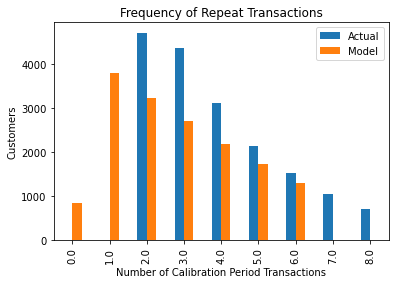

In [23]:
plot_period_transactions(bg_nbd)
plt.show()

In [24]:
gg=GammaGammaFitter(penalizer_coef=0.01).fit(cltv["frequency"],cltv["monetary_cltv_avg"])
gg

<lifetimes.GammaGammaFitter: fitted with 19945 subjects, p: 4.15, q: 0.47, v: 4.08>

In [25]:
cltv["expected_average_value"]=gg.conditional_expected_average_profit(cltv["frequency"],
                                                                       cltv["monetary_cltv_avg"])
cltv.sort_values(by="expected_average_value",ascending=False)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_value
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.857143,38.285714,4,1135.500000,0.210272,0.402008,1173.953029
15516,9083981a-f59e-11e9-841e-000d3a38a36f,63.571429,114.285714,4,1090.250000,0.204683,0.398956,1127.212626
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,8.285714,39.857143,2,862.500000,0.305364,0.588389,923.429247
16410,6fecd6c8-261a-11ea-8e1c-000d3a38a36f,57.000000,125.285714,2,859.500000,0.136765,0.268039,920.224893
1853,f02473b0-43c3-11eb-806e-000d3a38a36f,17.285714,53.571429,2,835.500000,0.266803,0.516365,894.590067
...,...,...,...,...,...,...,...,...
16003,c83ae112-ddea-11e9-a848-000d3a38a36f,78.428571,126.857143,3,26.666667,0.215598,0.421730,29.270325
7693,1e2dd6cc-0b1e-11eb-8ffc-000d3a38a36f,20.714286,63.857143,2,24.500000,0.219374,0.425711,28.346576
1710,08b95b62-a987-11e9-a2fc-000d3a38a36f,226.571429,262.857143,2,22.000000,0.145586,0.287786,25.676282
14980,0769f8d0-d627-11e9-93bc-000d3a38a36f,58.857143,123.857143,2,22.000000,0.147042,0.288136,25.676282


In [26]:
cltv_pred=gg.customer_lifetime_value(bg_nbd,
                           cltv["frequency"],
                           cltv["recency_cltv_weekly"],
                           cltv["T_weekly"],
                           cltv["monetary_cltv_avg"],
                           time=6,
                           freq="W")
cltv_pred.head()

0    54.851045
1    51.781311
2    33.874006
3    18.993864
4    49.388772
Name: clv, dtype: float64

In [27]:
cltv_final = cltv.merge(cltv_pred, how="left", left_index=True, right_index=True)
cltv_final

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_value,clv
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,61.000000,5,187.800000,0.141277,0.271658,193.552955,54.851045
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,255.285714,21,95.857143,0.262408,0.512496,96.638265,51.781311
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,109.285714,5,117.000000,0.137934,0.268161,120.899608,33.874006
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,51.285714,2,60.500000,0.140812,0.272343,66.798815,18.993864
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,125.857143,2,104.500000,0.211684,0.414896,113.795996,49.388772
...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,41.142857,118.857143,3,133.666667,0.081079,0.158443,141.021510,23.363234
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,42.285714,95.714286,2,195.000000,0.180077,0.351587,210.460652,77.360927
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,88.714286,120.285714,3,210.666667,0.280234,0.547727,221.440588,126.825443
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,98.428571,144.285714,6,168.166667,0.255719,0.498840,172.513542,89.958974


In [28]:
cltv_final.sort_values(by="clv",ascending=False)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_value,clv
9738,3a27b334-dff4-11ea-acaa-000d3a38a36f,40.000000,71.571429,3,837.000000,0.323819,0.627656,875.585380,573.958858
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,8.285714,39.857143,2,862.500000,0.305364,0.588389,923.429247,566.974207
14858,031b2954-6d28-11eb-99c4-000d3a38a36f,14.857143,46.000000,3,743.333333,0.324750,0.624833,777.759575,507.006145
11003,388eabac-7840-11ea-bfad-000d3a38a36f,59.571429,90.571429,4,688.500000,0.343448,0.666772,712.230157,496.086786
11694,90f1b7f2-bbad-11ea-a0c9-000d3a38a36f,47.285714,78.428571,6,647.333333,0.370011,0.713511,662.087512,493.008088
...,...,...,...,...,...,...,...,...,...
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,65.000000,125.285714,27,168.222222,0.000215,0.000412,169.172411,0.072671
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.714286,167.142857,27,168.222222,0.000075,0.000145,169.172411,0.025684
12621,5249b58c-2bfb-11ea-91ab-000d3a38a36f,72.428571,149.142857,27,149.666667,0.000028,0.000054,150.528784,0.008505
3883,eacb8de4-5b53-11ea-8a66-000d3a38a36f,23.000000,97.857143,17,101.176471,0.000038,0.000072,102.182987,0.007720


In [29]:
cltv_final["segments"]=pd.qcut(cltv_final["clv"], q=5, labels = ["at_risk"
                                                                 ,"about_sleep"
                                                                 ,"need_attention"
                                                                 ,"loyal_customers"
                                                                 ,"champions"])
cltv_final.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,expected_average_value,clv,segments
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,61.000000,5,187.800000,0.141277,0.271658,193.552955,54.851045,need_attention
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,255.285714,21,95.857143,0.262408,0.512496,96.638265,51.781311,need_attention
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,109.285714,5,117.000000,0.137934,0.268161,120.899608,33.874006,about_sleep
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,51.285714,2,60.500000,0.140812,0.272343,66.798815,18.993864,at_risk
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,125.857143,2,104.500000,0.211684,0.414896,113.795996,49.388772,about_sleep


In [30]:
cltv_final.groupby("segments")["recency_cltv_weekly","T_weekly"
                               ,"frequency","monetary_cltv_avg"
                               ,"expected_average_value","clv"].agg(["count","sum","mean"])

recency_cltv_weekly                            T_weekly  \
                              count            sum        mean    count   
segments                                                                  
at_risk                        3989  319704.857143   80.146617     3989   
about_sleep                    3989  406328.000000  101.862121     3989   
need_attention                 3989  408094.285714  102.304910     3989   
loyal_customers                3989  388468.428571   97.384916     3989   
champions                      3989  377434.857143   94.618916     3989   

                                           frequency                   \
                           sum        mean     count    sum      mean   
segments                                                                
at_risk          582572.714286  146.044802      3989  19527  4.895212   
about_sleep      623341.714286  156.265158      3989  16962  4.252194   
need_attention   596788.714286  149.608602      3989  19023  4.768864   
loyal_customers  558928.000000  140.117323      3989  20073  5.032088   
champions        528407.428571  132.466139      3989  22978  5.760341   

                monetary_cltv_avg                             \
                            count            sum        mean   
segments                                                       
at_risk                      3989  422076.217093  105.810032   
about_sleep                  3989  475141.488775  119.112933   
need_attention               3989  544810.754269  136.578279   
loyal_customers              3989  657566.131466  164.844856   
champions                    3989  927533.545425  232.522824   

                expected_average_value                              clv  \
                                 count            sum        mean count   
segments                                                                  
at_risk                           3989  443047.306169  111.067262  3989   
about_sleep                       3989  500220.589149  125.399997  3989   
need_attention                    3989  571286.540773  143.215478  3989   
loyal_customers                   3989  688152.547609  172.512546  3989   
champions                         3989  966498.873857  242.291019  3989   

                                            
                           sum        mean  
segments                                    
at_risk           83130.312249   20.839888  
about_sleep      164874.205949   41.332215  
need_attention   236081.738389   59.183188  
loyal_customers  327691.019471   82.148664  
champions        546387.538444  136.973562